## Import de librerías necesarias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,  GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, accuracy_score, 
                classification_report, precision_score, recall_score, f1_score,mean_squared_error, r2_score)
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

## Trabajando con el DataFrame completo

### Análisis de datos


In [6]:
df = pd.read_csv('../data/raw/data.csv')

In [4]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [59]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

<Axes: >

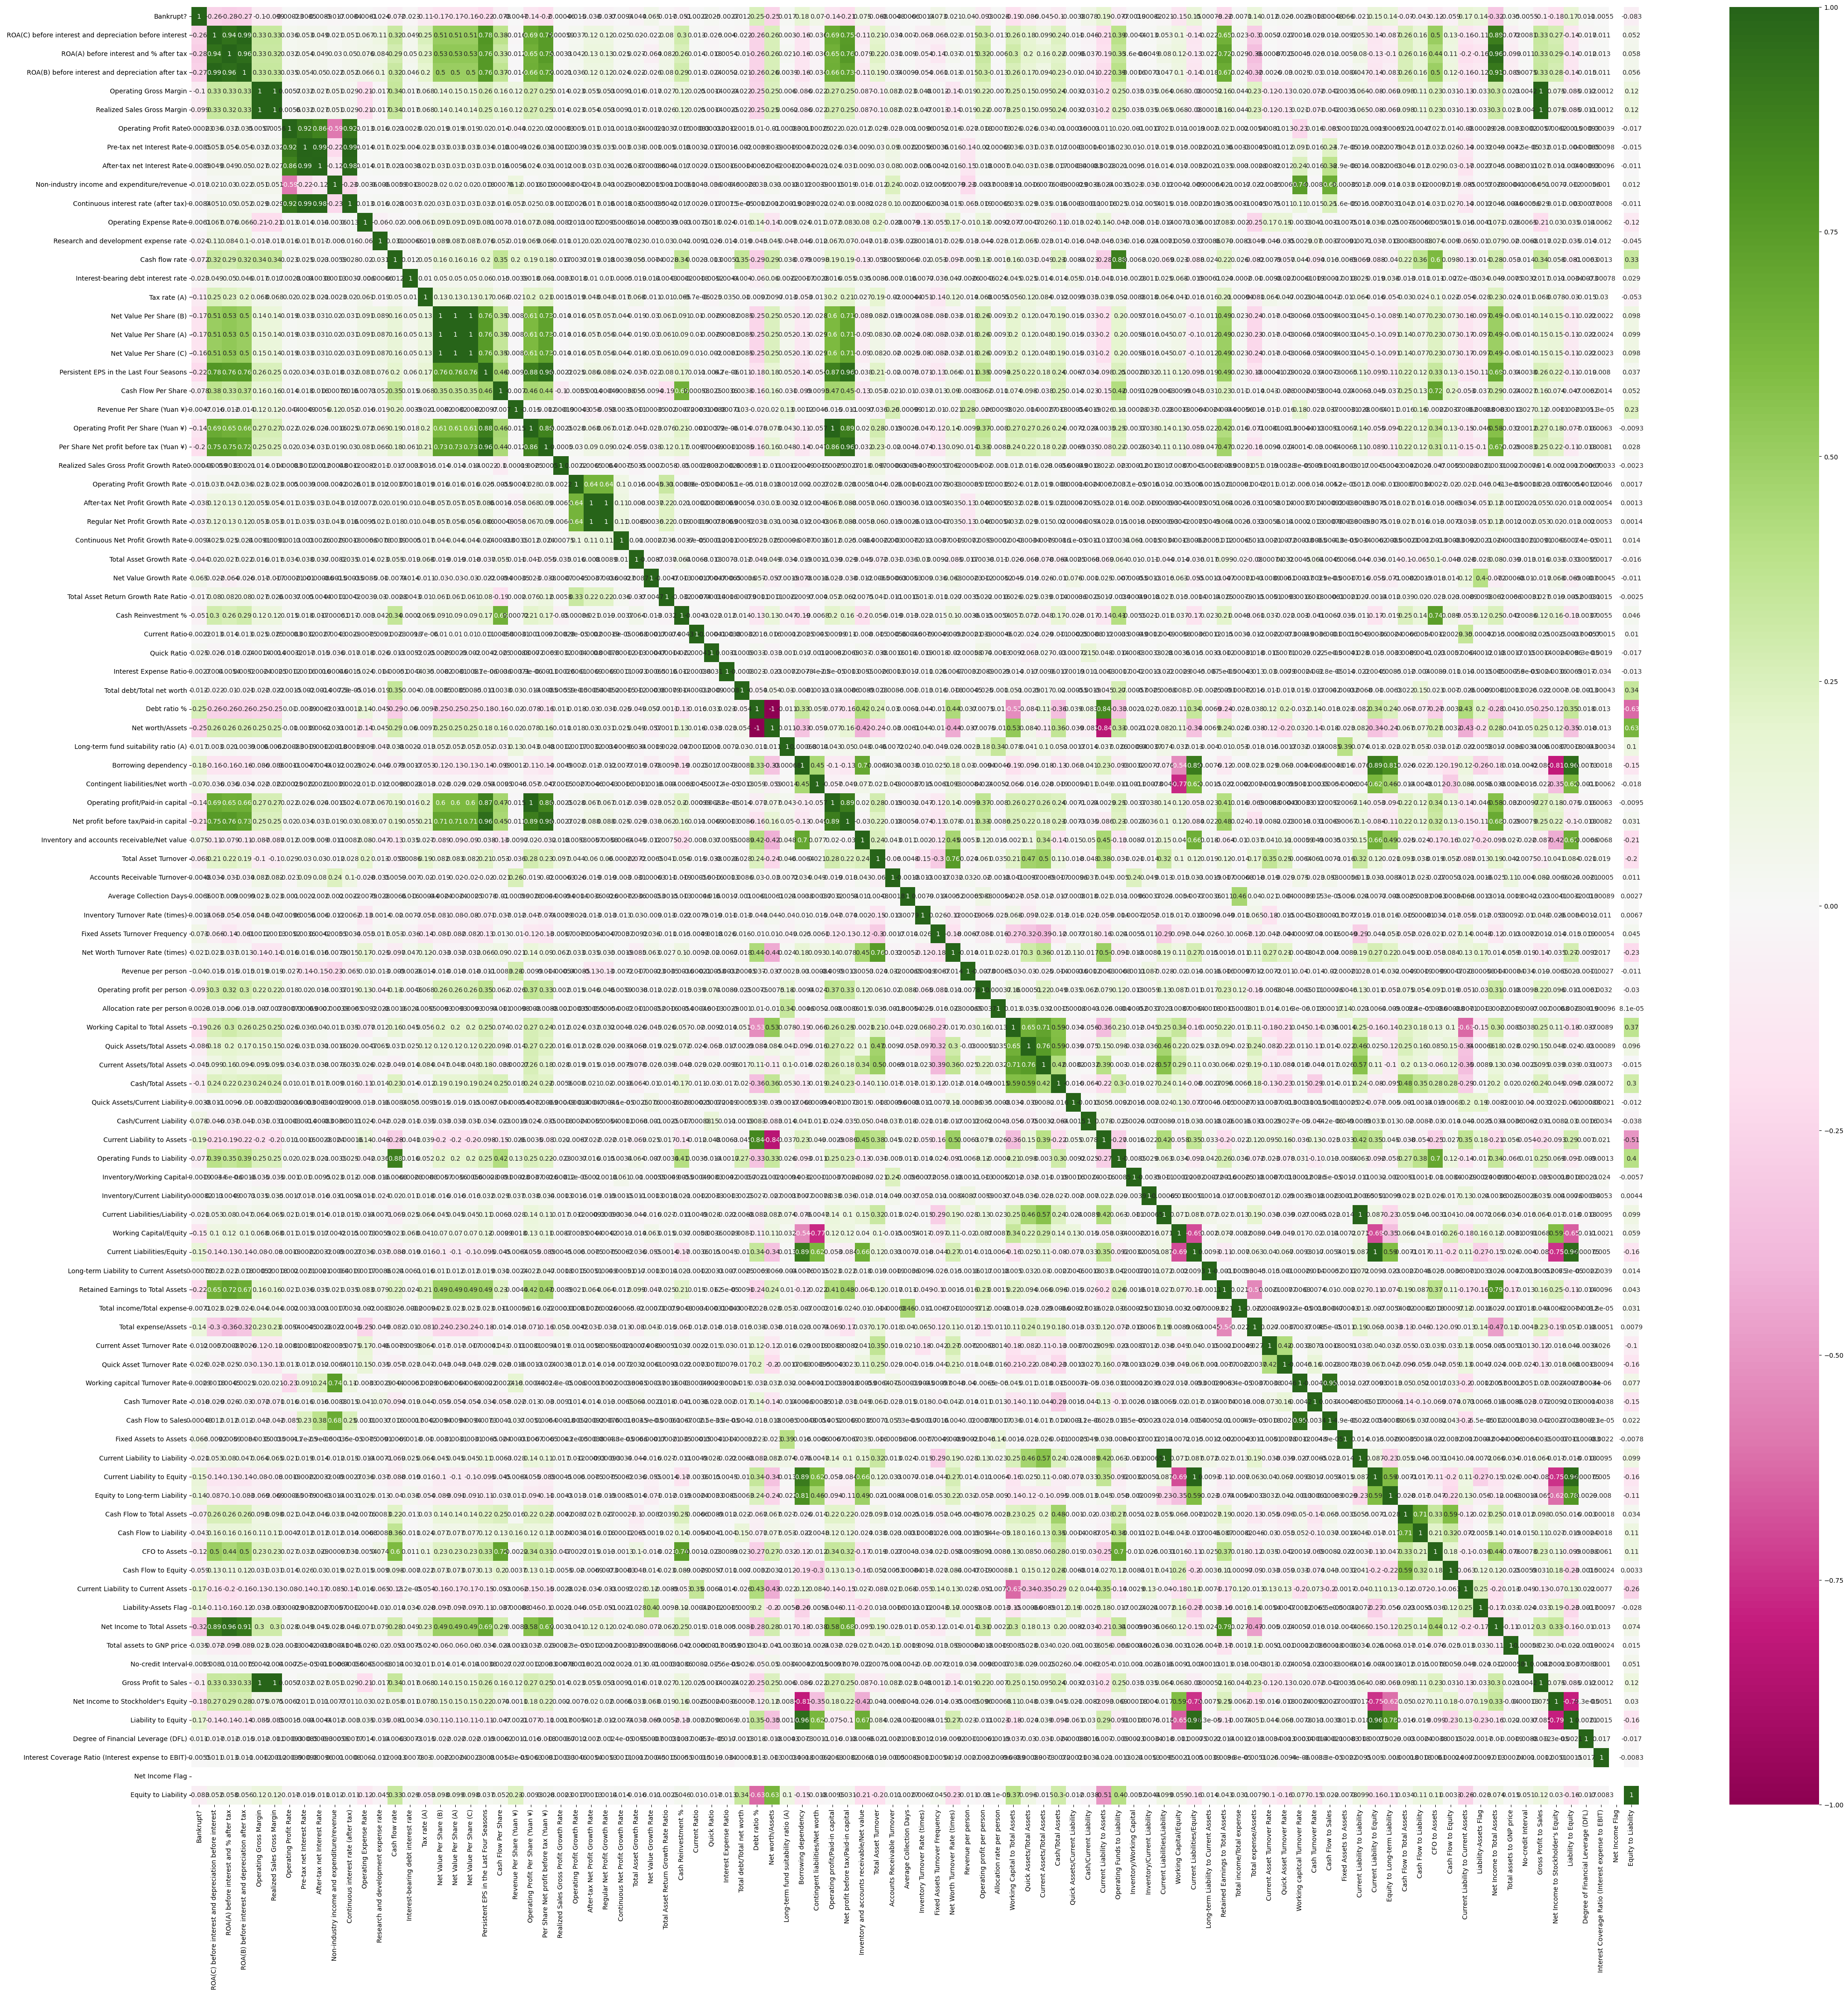

In [5]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,vmax=1, annot=True, cmap="PiYG")

In [6]:
df[" Net Income Flag"].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 6819 entries, 0 to 6818
Series name:  Net Income Flag
Non-Null Count  Dtype
--------------  -----
6819 non-null   int64
dtypes: int64(1)
memory usage: 53.4 KB


In [7]:
df[" Net Income Flag"].drop_duplicates()

0    1
Name:  Net Income Flag, dtype: int64

In [8]:
print(df[" Net Income Flag"].unique())   #net profit or net loss, always 1. Unnecesary
print(df[" Net Income Flag"].value_counts())


[1]
 Net Income Flag
1    6819
Name: count, dtype: int64


In [7]:
df.drop(columns=[" Net Income Flag"], inplace=True)

In [9]:
print(df["Bankrupt?"].unique())
print(df["Bankrupt?"].value_counts())
print(6599/6819,220/6819)

[1 0]
Bankrupt?
0    6599
1     220
Name: count, dtype: int64
0.967737204868749 0.03226279513125092


### Definición de Train y Test

In [8]:
X = df.drop(columns=["Bankrupt?"])
y= df["Bankrupt?"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Prueba random forest sin balancear datos

In [65]:
# Dataset sin balancear
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf.fit(X_train, y_train)

# Evaluamos en el conjunto de test original
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[1311    2]
 [  44    7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.78      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.87      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364

ROC AUC: 0.9450965458536804


### Balance de datos con SMOTE

In [21]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [27]:
y_train_bal.value_counts()

Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

In [67]:
# Training con dataset balanceado
rf1 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf1.fit(X_train_bal, y_train_bal)

# Evaluamos en el conjunto de test original
y_pred = rf1.predict(X_test)
y_proba = rf1.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[1278   35]
 [  17   34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1313
           1       0.49      0.67      0.57        51

    accuracy                           0.96      1364
   macro avg       0.74      0.82      0.77      1364
weighted avg       0.97      0.96      0.96      1364

ROC AUC: 0.9504651822648329


### GridSearch Random Forest

In [ ]:
# GridSearch de mejores parámetros para RandomForestClassifier

param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10, 20, 30, 40],
    "n_estimators": [50, 100, 150, 200]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1),
    param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train) #Grid search sin balancear??

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

In [17]:
print("Mejores parámetros encontrados:")
print(grid.best_params_)

Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [11]:
# Training con los mejores parámetros encontrados
rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    min_samples_leaf=10,
    min_samples_split=2,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf2.fit(X_train_bal, y_train_bal)

# Evaluamos en el conjunto de test original
y_pred = rf2.predict(X_test)
y_proba = rf2.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[1241   72]
 [  13   38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.35      0.75      0.47        51

    accuracy                           0.94      1364
   macro avg       0.67      0.85      0.72      1364
weighted avg       0.97      0.94      0.95      1364

ROC AUC: 0.9560354225467795


C:\Users\danie\AppData\Local\Temp\ipykernel_21928\3663056233.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(30),


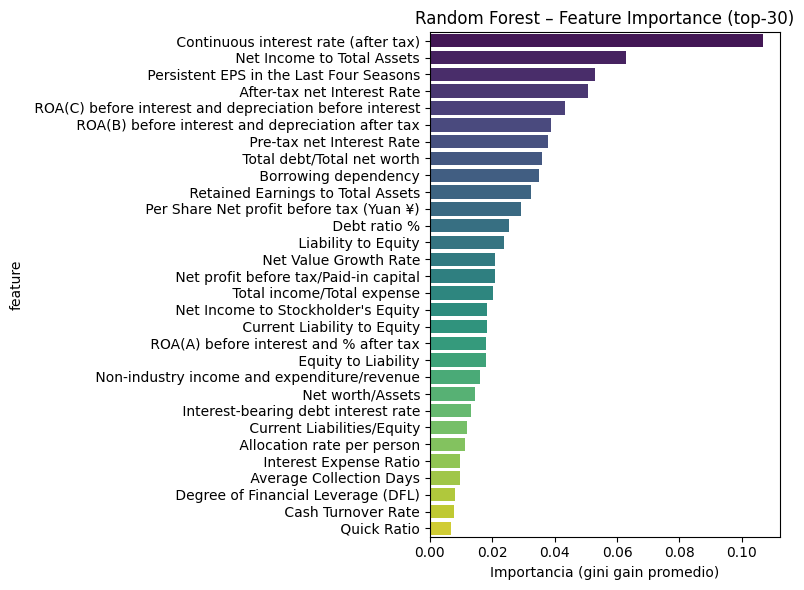

In [15]:

importancias = rf2.feature_importances_
feat_names  = X_train_bal.columns  
feat_imp_df = pd.DataFrame({"feature": feat_names,
                            "importance": importancias})
feat_imp_df = feat_imp_df.sort_values(by="importance", ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_df.head(30),
            x="importance", y="feature",
            palette="viridis")
plt.title("Random Forest – Feature Importance (top-30)")
plt.xlabel("Importancia (gini gain promedio)")
plt.tight_layout()
plt.show();


C:\Users\danie\AppData\Local\Temp\ipykernel_21928\3093497988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.tail(20),


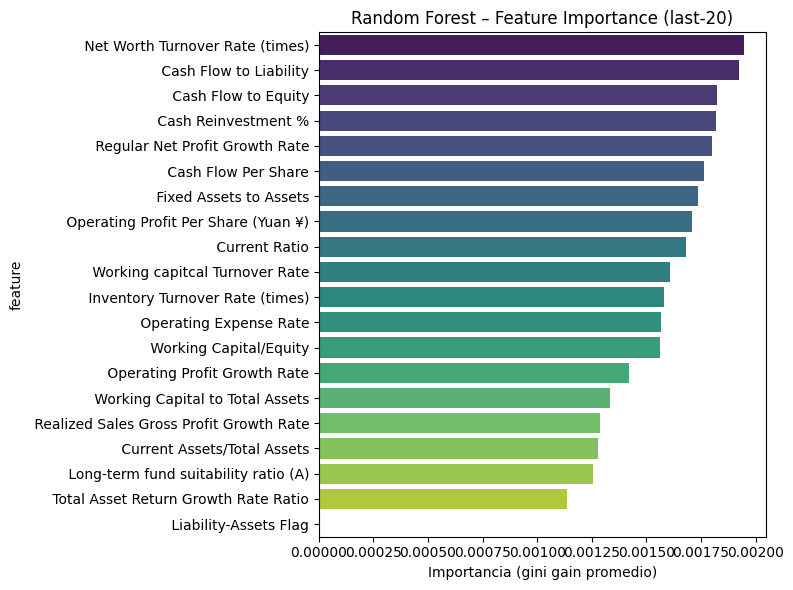

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_df.tail(20),
            x="importance", y="feature",
            palette="viridis")
plt.title("Random Forest – Feature Importance (last-20)")
plt.xlabel("Importancia (gini gain promedio)")
plt.tight_layout()
plt.show();

### Comparación threshold para random forest

In [24]:
# Comparación con diferentes Threshold

y_proba_test = rf2.predict_proba(X_test)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Quiebra", "Quiebra"]))


Threshold: 0.10
Confusion Matrix:
[[997 316]
 [  1  50]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.76      0.86      1313
     Quiebra       0.14      0.98      0.24        51

    accuracy                           0.77      1364
   macro avg       0.57      0.87      0.55      1364
weighted avg       0.97      0.77      0.84      1364


Threshold: 0.15
Confusion Matrix:
[[1063  250]
 [   4   47]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.81      0.89      1313
     Quiebra       0.16      0.92      0.27        51

    accuracy                           0.81      1364
   macro avg       0.58      0.87      0.58      1364
weighted avg       0.96      0.81      0.87      1364


Threshold: 0.20
Confusion Matrix:
[[1118  195]
 [   6   45]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.85      0

### GridSearch de otros modelos

In [ ]:
# GridSearch de otros modelos 

# Definir modelos y sus grids
grids = {
    
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100,200],
            "learning_rate": [0.5, 1.0,1.5]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100,200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5,10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100,200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5,10]
        }
    }
}

# Resultados
resultados_grid = []

for nombre, objeto in grids.items():
    grid = GridSearchCV(objeto["model"], objeto["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_bal, y_train_bal)
    
    resultados_grid.append({
        "Modelo": nombre,
        "Mejor Accuracy": grid.best_score_,
        "Mejores Parámetros": grid.best_params_
    })

# DataFrame resumen
df_resultados_grid = pd.DataFrame(resultados_grid).sort_values(by="Mejor Accuracy", ascending=False)
df_resultados_grid


In [ ]:
# Resultado GridSearch de modelos, ejecutado previamente en otro Notebook.
'''
Modelo  Mejor Accuracy                                           Mejores Parámetros
         XGBoost        0.986001  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GradientBoosting        0.984298 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
        AdaBoost        0.958759                  {'learning_rate': 1.5, 'n_estimators': 200}
'''

### Entrenamiento de modelos Adaboost, GradientBoosting y XGBoost con los mejores parámetros.

In [26]:
# Entrenamiento de modelos con los mejores parámetros encontrados
# AdaBoost
ada = AdaBoostClassifier(n_estimators=200, learning_rate=1.5, random_state=42)
ada.fit(X_train_bal, y_train_bal)

# GradientBoosting
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
gb.fit(X_train_bal, y_train_bal)

# XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

### Resultados Adaboost, GradientBoosting, XGBoost.

In [27]:
modelos = {
    "AdaBoost": ada,
    "GradientBoosting": gb,
    "XGBoost": xgb
}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    print(f"\n Confusion Matrix - {nombre}")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Quiebra", "Quiebra"]))


 Confusion Matrix - AdaBoost
[[1252   61]
 [  18   33]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.95      0.97      1313
     Quiebra       0.35      0.65      0.46        51

    accuracy                           0.94      1364
   macro avg       0.67      0.80      0.71      1364
weighted avg       0.96      0.94      0.95      1364


 Confusion Matrix - GradientBoosting
[[1290   23]
 [  21   30]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.98      0.98      0.98      1313
     Quiebra       0.57      0.59      0.58        51

    accuracy                           0.97      1364
   macro avg       0.78      0.79      0.78      1364
weighted avg       0.97      0.97      0.97      1364


 Confusion Matrix - XGBoost
[[1288   25]
 [  17   34]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.98      0.

### Comparación Threshold para XGB.

In [15]:
y_proba_test = xgb.predict_proba(X_test)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Quiebra", "Quiebra"]))


Threshold: 0.10
Confusion Matrix:
[[1254   59]
 [  13   38]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.96      0.97      1313
     Quiebra       0.39      0.75      0.51        51

    accuracy                           0.95      1364
   macro avg       0.69      0.85      0.74      1364
weighted avg       0.97      0.95      0.95      1364


Threshold: 0.15
Confusion Matrix:
[[1262   51]
 [  15   36]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.96      0.97      1313
     Quiebra       0.41      0.71      0.52        51

    accuracy                           0.95      1364
   macro avg       0.70      0.83      0.75      1364
weighted avg       0.97      0.95      0.96      1364


Threshold: 0.20
Confusion Matrix:
[[1269   44]
 [  15   36]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.97   

## DataFrame sin las columnas con correlación mayor a 0.9

### Limpieza de columnas con correlación mayor a 0.9

In [16]:
def find_highly_correlated_pairs(df, threshold=0.9):
    corr_matrix = df.corr(numeric_only=True)
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]

            if abs(corr_value) >= threshold:
                correlated_pairs.append((var1, var2, corr_value))

    return sorted(correlated_pairs, key=lambda x: -abs(x[2]))

In [17]:
pares = find_highly_correlated_pairs(df, threshold=0.9)
for var1, var2, corr in pares:
    print(f"{var1} <--> {var2} | Correlación: {corr:.3f}")

 Current Liabilities/Liability <-->  Current Liability to Liability | Correlación: 1.000
 Current Liabilities/Equity <-->  Current Liability to Equity | Correlación: 1.000
 Debt ratio % <-->  Net worth/Assets | Correlación: -1.000
 Operating Gross Margin <-->  Gross Profit to Sales | Correlación: 1.000
 Net Value Per Share (A) <-->  Net Value Per Share (C) | Correlación: 1.000
 Operating Gross Margin <-->  Realized Sales Gross Margin | Correlación: 1.000
 Realized Sales Gross Margin <-->  Gross Profit to Sales | Correlación: 1.000
 Net Value Per Share (B) <-->  Net Value Per Share (A) | Correlación: 0.999
 Net Value Per Share (B) <-->  Net Value Per Share (C) | Correlación: 0.999
 Operating Profit Per Share (Yuan ¥) <-->  Operating profit/Paid-in capital | Correlación: 0.999
 After-tax Net Profit Growth Rate <-->  Regular Net Profit Growth Rate | Correlación: 0.996
 Pre-tax net Interest Rate <-->  Continuous interest rate (after tax) | Correlación: 0.994
 ROA(C) before interest and dep

In [29]:
df2 = df.drop(columns=[' ROA(C) before interest and depreciation before interest',
' ROA(B) before interest and depreciation after tax',
' Pre-tax net Interest Rate',
' Realized Sales Gross Margin',
' Gross Profit to Sales',
" Net Income to Stockholder's Equity",
' Current Liabilities/Equity',
' Borrowing dependency',
' Net Value Per Share (C)',
' Net Value Per Share (B)',
' After-tax Net Profit Growth Rate',
' Net worth/Assets',
' Cash Flow to Equity',
' Current Liability to Equity',
' Current Liability to Liability',
' Realized Sales Gross Margin',
' After-tax Net Profit Growth Rate',
' Continuous interest rate (after tax)',
' Persistent EPS in the Last Four Seasons',
' Operating Profit Per Share (Yuan ¥)',
' Working capitcal Turnover Rate',' Operating Profit Rate',' Net Income to Total Assets',' Operating profit/Paid-in capital',
' Cash Flow to Liability'," Net Income Flag"," Per Share Net profit before tax (Yuan ¥)"])

### Defino Train y Test con el nuevo DataFrame

In [30]:
X2 = df2.drop(columns=["Bankrupt?"])
y2 = df2["Bankrupt?"]

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)

### Balance de datos con SMOTE

In [32]:
smote = SMOTE(random_state=42)
X_train_bal2, y_train_bal2= smote.fit_resample(X_train2, y_train2)

In [33]:
y_train_bal2.unique
y_train_bal2.value_counts()

Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

### Logistic Regression

In [34]:
model = LogisticRegression(class_weight="balanced", max_iter=5000)

model.fit(X_train_bal2, y_train_bal2)

predictions = model.predict(X_test2)

print("Accuracy:", accuracy_score(y_test2, predictions))
print("Confusion matrix:\n", confusion_matrix(y_test2, predictions))
print("Report:\n", classification_report(y_test2, predictions))

Accuracy: 0.7675953079178885
Confusion matrix:
 [[1025  288]
 [  29   22]]
Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      1313
           1       0.07      0.43      0.12        51

    accuracy                           0.77      1364
   macro avg       0.52      0.61      0.49      1364
weighted avg       0.94      0.77      0.84      1364



### RandomForest

In [41]:
rf3 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    min_samples_leaf=10,
    min_samples_split=2,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf3.fit(X_train_bal2, y_train_bal2)

# Evaluamos en el conjunto de test original
y_pred = rf3.predict(X_test2)
y_proba = rf3.predict_proba(X_test2)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))

Confusion Matrix:
 [[1241   72]
 [  14   37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.34      0.73      0.46        51

    accuracy                           0.94      1364
   macro avg       0.66      0.84      0.71      1364
weighted avg       0.96      0.94      0.95      1364

ROC AUC: 0.9581559965951346


In [ ]:
menos  balance, más arboles,

### XGB

In [54]:
xgb2 = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42)
xgb2.fit(X_train_bal2, y_train_bal2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
y_pred = xgb2.predict(X_test2)
y_proba = xgb2.predict_proba(X_test2)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))

Confusion Matrix:
 [[1291   22]
 [  18   33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1313
           1       0.60      0.65      0.62        51

    accuracy                           0.97      1364
   macro avg       0.79      0.82      0.80      1364
weighted avg       0.97      0.97      0.97      1364

ROC AUC: 0.9580813284948405


In [56]:
# Calcular las probabilidades en el test
y_proba_test = xgb2.predict_proba(X_test2)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test2, y_pred))
    print("Classification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))


Threshold: 0.10
Confusion Matrix:
[[1250   63]
 [  14   37]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.95      0.97      1313
     Quiebra       0.37      0.73      0.49        51

    accuracy                           0.94      1364
   macro avg       0.68      0.84      0.73      1364
weighted avg       0.97      0.94      0.95      1364


Threshold: 0.15
Confusion Matrix:
[[1259   54]
 [  15   36]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.96      0.97      1313
     Quiebra       0.40      0.71      0.51        51

    accuracy                           0.95      1364
   macro avg       0.69      0.83      0.74      1364
weighted avg       0.97      0.95      0.96      1364


Threshold: 0.20
Confusion Matrix:
[[1272   41]
 [  16   35]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.97   

### GridSearch para encontrar mejores parámetros con el nuevo DataFrame

In [ ]:

# Definir modelos y sus grids
grids = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, None]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1.0]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    }
}

# Resultados
resultados_grid2 = []

for nombre, objeto in grids.items():
    grid = GridSearchCV(objeto["model"], objeto["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_bal2, y_train_bal2)
    
    resultados_grid2.append({
        "Modelo": nombre,
        "Mejor Accuracy": grid.best_score_,
        "Mejores Parámetros": grid.best_params_
    })

# DataFrame resumen
df_resultados_grid2 = pd.DataFrame(resultados_grid).sort_values(by="Mejor Accuracy", ascending=False)
df_resultados_grid2


Modelo  Mejor Accuracy  \
4           XGBoost        0.981650   
1      RandomForest        0.981366   
3  GradientBoosting        0.978150   
0          AdaBoost        0.958759   
2          AdaBoost        0.939557   

                                  Mejores Parámetros  
4  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
1            {'max_depth': None, 'n_estimators': 50}  
3  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
0        {'learning_rate': 1.5, 'n_estimators': 200}  
2        {'learning_rate': 1.0, 'n_estimators': 100}

In [58]:
print(df_resultados_grid2.to_string(index=False))

          Modelo  Mejor Accuracy                                          Mejores Parámetros
         XGBoost        0.981650 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
    RandomForest        0.981366                     {'max_depth': None, 'n_estimators': 50}
GradientBoosting        0.978150 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
        AdaBoost        0.958759                 {'learning_rate': 1.5, 'n_estimators': 200}
        AdaBoost        0.939557                 {'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10, 20],
    "n_estimators": [50, 100, 150]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1),
    param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_bal2, y_train_bal2)




GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [60]:
print("✅ Mejores parámetros encontrados:")
print(grid.best_params_)

✅ Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


### Training con los mejores parámetros encontrados

In [42]:
rf4 = RandomForestClassifier(class_weight="balanced",
    n_estimators=150,
    max_depth=None,
    random_state=42,
    min_samples_leaf=1,
    min_samples_split=2,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf4.fit(X_train_bal2, y_train_bal2)

# Evaluamos en el conjunto de test original
y_pred = rf4.predict(X_test2)
y_proba = rf4.predict_proba(X_test2)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred))
print("\nClassification Report:\n", classification_report(y_test2, y_pred))
print("ROC AUC:", roc_auc_score(y_test2, y_proba))

Confusion Matrix:
 [[1283   30]
 [  18   33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1313
           1       0.52      0.65      0.58        51

    accuracy                           0.96      1364
   macro avg       0.75      0.81      0.78      1364
weighted avg       0.97      0.96      0.97      1364

ROC AUC: 0.954191120469513


In [ ]:
# Comparación con diferentes Threshold

y_proba_test = rf4.predict_proba(X_test2)[:, 1]

# Probar varios thresholds
thresholds = np.linspace(0.1, 0.9, 17)

for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Quiebra", "Quiebra"]))


Threshold: 0.10
Confusion Matrix:
[[1069  244]
 [   3   48]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.81      0.90      1313
     Quiebra       0.16      0.94      0.28        51

    accuracy                           0.82      1364
   macro avg       0.58      0.88      0.59      1364
weighted avg       0.97      0.82      0.87      1364


Threshold: 0.15
Confusion Matrix:
[[1125  188]
 [   5   46]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       1.00      0.86      0.92      1313
     Quiebra       0.20      0.90      0.32        51

    accuracy                           0.86      1364
   macro avg       0.60      0.88      0.62      1364
weighted avg       0.97      0.86      0.90      1364


Threshold: 0.20
Confusion Matrix:
[[1178  135]
 [   8   43]]
Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.90   

In [47]:
# AdaBoost
ada2 = AdaBoostClassifier(n_estimators=200, learning_rate=1.5, random_state=42)
ada2.fit(X_train_bal2, y_train_bal2)

# GradientBoosting
gb2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb2.fit(X_train_bal2, y_train_bal2)

# XGBoost
xgb2 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42)
xgb2.fit(X_train_bal2, y_train_bal2)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

modelos = {
    "AdaBoost": ada2,
    "GradientBoosting": gb2,
    "XGBoost": xgb2
}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test2)

    print(f"\n🔍 Confusion Matrix - {nombre} (Threshold=0.5 por defecto)")
    print(confusion_matrix(y_test2, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test2, y_pred, target_names=["No Quiebra", "Quiebra"]))


🔍 Confusion Matrix - AdaBoost (Threshold=0.5 por defecto)
[[1253   60]
 [  18   33]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.95      0.97      1313
     Quiebra       0.35      0.65      0.46        51

    accuracy                           0.94      1364
   macro avg       0.67      0.80      0.71      1364
weighted avg       0.96      0.94      0.95      1364


🔍 Confusion Matrix - GradientBoosting (Threshold=0.5 por defecto)
[[1276   37]
 [  18   33]]

Classification Report:
              precision    recall  f1-score   support

  No Quiebra       0.99      0.97      0.98      1313
     Quiebra       0.47      0.65      0.55        51

    accuracy                           0.96      1364
   macro avg       0.73      0.81      0.76      1364
weighted avg       0.97      0.96      0.96      1364


🔍 Confusion Matrix - XGBoost (Threshold=0.5 por defecto)
[[1283   30]
 [  16   35]]

Classification Report:
         

## Resultados

In [20]:

# Lista de métricas por modelo
resultados = [
    {"modelo": "rf1", "accuracy": 0.96, "recall_1": 0.65, "precision_1": 0.50, "f1_1": 0.56, "roc_auc": 0.9532},
    {"modelo": "rf2", "accuracy": 0.93, "recall_1": 0.75, "precision_1": 0.33, "f1_1": 0.46, "roc_auc": 0.9573},
    {"modelo": "rf3", "accuracy": 0.94, "recall_1": 0.73, "precision_1": 0.34, "f1_1": 0.46, "roc_auc": 0.9582},
    {"modelo": "rf4", "accuracy": 0.96, "recall_1": 0.65, "precision_1": 0.52, "f1_1": 0.58, "roc_auc": 0.9542},
    {"modelo": "ada", "accuracy": 0.94, "recall_1": 0.65, "precision_1": 0.35, "f1_1": 0.46, "roc_auc": None},
    {"modelo": "ada2", "accuracy": 0.94, "recall_1": 0.65, "precision_1": 0.35, "f1_1": 0.46, "roc_auc": None},
    {"modelo": "gb", "accuracy": 0.97, "recall_1": 0.59, "precision_1": 0.57, "f1_1": 0.58, "roc_auc": None},
    {"modelo": "gb2", "accuracy": 0.96, "recall_1": 0.65, "precision_1": 0.47, "f1_1": 0.55, "roc_auc": None},
    {"modelo": "xgb", "accuracy": 0.97, "recall_1": 0.67, "precision_1": 0.58, "f1_1": 0.62, "roc_auc": None},
    {"modelo": "xgb2", "accuracy": 0.97, "recall_1": 0.65, "precision_1": 0.60, "f1_1": 0.62, "roc_auc": 0.9581},
    {"modelo": "xgb3", "accuracy": 0.97, "recall_1": 0.69, "precision_1": 0.54, "f1_1": 0.60, "roc_auc": None},
    {"modelo": "logistic_filtered", "accuracy": 0.7676, "recall_1": 0.43, "precision_1": 0.07, "f1_1": 0.12, "roc_auc": None}
]

# Crear DataFrame
df_modelos = pd.DataFrame(resultados)

# Opcional: ordenar por recall_1 descendente
df_modelos = df_modelos.sort_values(by="recall_1", ascending=False).reset_index(drop=True)

# Mostrar
df_modelos


modelo  accuracy  recall_1  precision_1  f1_1  roc_auc
0                 rf2    0.9300      0.75         0.33  0.46   0.9573
1                 rf3    0.9400      0.73         0.34  0.46   0.9582
2                xgb3    0.9700      0.69         0.54  0.60      NaN
3                 xgb    0.9700      0.67         0.58  0.62      NaN
4                 rf4    0.9600      0.65         0.52  0.58   0.9542
5                 rf1    0.9600      0.65         0.50  0.56   0.9532
6                 ada    0.9400      0.65         0.35  0.46      NaN
7                ada2    0.9400      0.65         0.35  0.46      NaN
8                xgb2    0.9700      0.65         0.60  0.62   0.9581
9                 gb2    0.9600      0.65         0.47  0.55      NaN
10                 gb    0.9700      0.59         0.57  0.58      NaN
11  logistic_filtered    0.7676      0.43         0.07  0.12      NaN

In [51]:
rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    min_samples_leaf=10,
    min_samples_split=2,
    
    n_jobs=-1  # para aprovechar todos los núcleos del procesador
)

rf2.fit(X_train_bal, y_train_bal)

# Evaluamos en el conjunto de test original
y_pred = rf2.predict(X_test)
y_proba = rf2.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[1235   78]
 [  13   38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1313
           1       0.33      0.75      0.46        51

    accuracy                           0.93      1364
   macro avg       0.66      0.84      0.71      1364
weighted avg       0.96      0.93      0.95      1364

ROC AUC: 0.9573047802517809


In [ ]:
# Resultado random forest sin columnas correlacionadas: 
'''Confusion Matrix:
 [[1241   72]
 [  14   37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.34      0.73      0.46        51

    accuracy                           0.94      1364
   macro avg       0.66      0.84      0.71      1364
weighted avg       0.96      0.94      0.95      1364

ROC AUC: 0.9581559965951346'''

#### Uso y público objetivo
Threshold se utilizará para medir el rango de riesgo, en vez de devolverme 0 o 1 me devuelve probabilidad de quiebra, 
lo cual utilizaré para asignar nivel de riesgo y dar recomendaciones basadas en el nivel de riesgo. 

Integrar API IA para analizar estados financieros de las empresas y obtener las variables necesarias para el modelo. Utilizar la IA para resumen financiero con algunas gráficas. IA Finance Tool

Público objetivo: son bancos, entidades financieras, inversores, auditores,consultores que quieran medir el nivel de riesgo de una empresa.
También sirve como herramienta de autodiagnóstico para las empresas.

In [ ]:
'''


Ejemplo:
y_pred = (proba >= 0.50).astype(int)

def asignar_nivel_de_riesgo(prob):
    if prob >= 0.75:
        return "Muy Alto Riesgo"
    elif prob >= 0.50:
        return "Alto Riesgo"
    elif prob >= 0.30:
        return "Riesgo Moderado"
    else:
        return "Bajo Riesgo"
df_resultados = X_test.copy()
df_resultados["proba_quiebra"] = probas
df_resultados["nivel_riesgo"] = niveles_riesgo

''' 


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def obtener_metricas_por_threshold(y_true, y_proba, thresholds):
    resultados = []

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)

        resultados.append({
            "threshold": t,
            "accuracy": accuracy_score(y_true, y_pred),
            "precision": precision_score(y_true, y_pred, zero_division=0),
            "recall": recall_score(y_true, y_pred),
            "f1_score": f1_score(y_true, y_pred)
        })

    return pd.DataFrame(resultados)


In [55]:
# Tus thresholds ya definidos
thresholds = np.linspace(0.1, 0.9, 17)  # 0.10, 0.15, ..., 0.90

# Calculamos métricas automáticamente
df_metricas = obtener_metricas_por_threshold(y_test, y_proba_test, thresholds)
display(df_metricas)


threshold  accuracy  precision    recall  f1_score
0        0.10  0.767595   0.136612  0.980392  0.239808
1        0.15  0.813783   0.158249  0.921569  0.270115
2        0.20  0.852639   0.187500  0.882353  0.309278
3        0.25  0.876100   0.213592  0.862745  0.342412
4        0.30  0.894428   0.240223  0.843137  0.373913
5        0.35  0.906891   0.262500  0.823529  0.398104
6        0.40  0.917155   0.281690  0.784314  0.414508
7        0.45  0.924487   0.296875  0.745098  0.424581
8        0.50  0.933284   0.327586  0.745098  0.455090
9        0.55  0.945015   0.377551  0.725490  0.496644
10       0.60  0.954545   0.432099  0.686275  0.530303
11       0.65  0.959677   0.472222  0.666667  0.552846
12       0.70  0.964809   0.524590  0.627451  0.571429
13       0.75  0.972874   0.640000  0.627451  0.633663
14       0.80  0.978006   0.744186  0.627451  0.680851
15       0.85  0.973607   0.741935  0.450980  0.560976
16       0.90  0.970674   0.923077  0.235294  0.375000

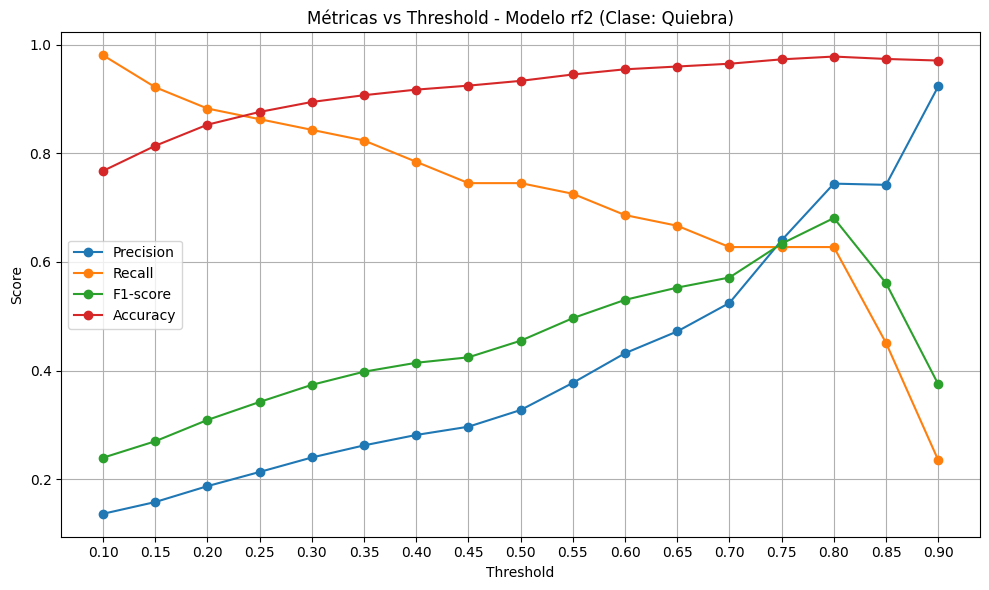

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(df_metricas["threshold"], df_metricas["precision"], label="Precision", marker='o')
plt.plot(df_metricas["threshold"], df_metricas["recall"], label="Recall", marker='o')
plt.plot(df_metricas["threshold"], df_metricas["f1_score"], label="F1-score", marker='o')
plt.plot(df_metricas["threshold"], df_metricas["accuracy"], label="Accuracy", marker='o')

plt.title("Métricas vs Threshold - Modelo rf2 (Clase: Quiebra)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.xticks(thresholds.round(2))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


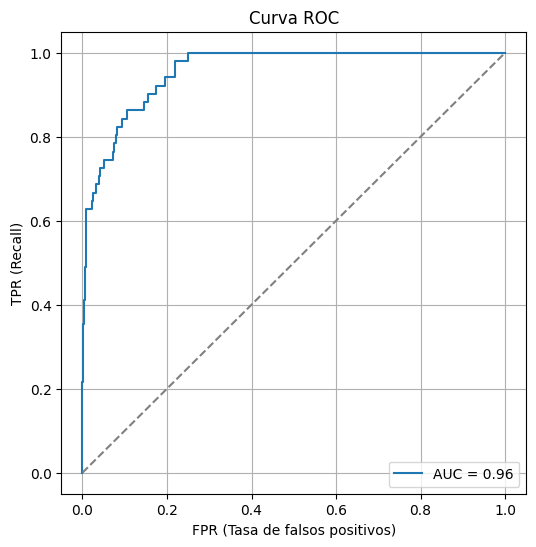

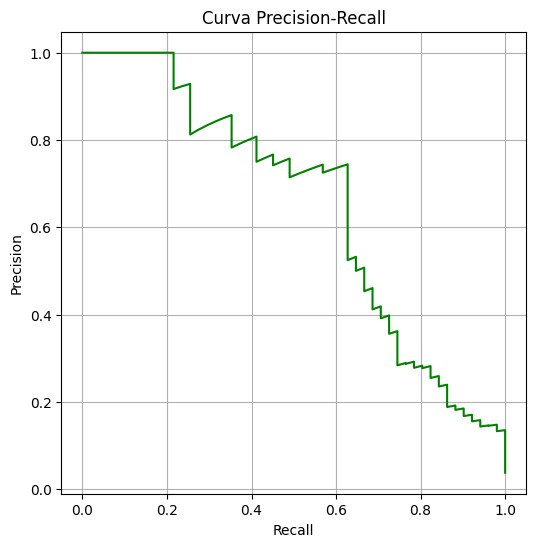

In [57]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("FPR (Tasa de falsos positivos)")
plt.ylabel("TPR (Recall)")
plt.legend()
plt.grid()
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_test)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='green')
plt.title("Curva Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


In [ ]:
# En la mayoría de tus modelos, estás utilizando el conjunto de test sin modificar (X_test, y_test) para evaluar,
#  pero el conjunto de entrenamiento ha sido balanceado con SMOTE. SMOTE genera datos sintéticos basados en los datos de entrenamiento,
#  por lo que si haces feature selection, normalización o eliminación de variables después de hacer train_test_split, está correcto. 
# Pero si lo haces antes, existe una fuga potencial.
# Reutilizar la misma variable y_proba
# La sobreescribes varias veces; en secciones distintas termina referenciando otro modelo

In [29]:
# realizar undersampling, 30-40, buscar mejores parámetros para el random forest. Reducir variables. gridsearch de 100 en 100, 
# focalizarlo para encontrar el mejor parámetro.

streamlit no se puede usar los notebook, tiene que ser .py
import streamlit, librerias normales (gráficos,pandas, etc)
streamlit da métodos de python para generar botones y página web.
par ejecutr como web y no script de python se debe ejecutar en terminal así= streamlit run main.py, te abre la página web

import streamlit as st, con métodos de streamlit
st.title("hola mundo")
T
